In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/ch2_scores_em.csv',
            index_col = 'student number')

In [6]:
en_scores = df['english'].values[:10]
ma_scores = df['mathematics'].values[:10]

In [8]:
scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                        name = 'student'))

In [9]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [10]:
# 공분산 - 두 변수 사이 관계성을 나타냄, 값이 제각각일 수 있음 -> 표준화하기, 직사각형(-: 음의 상관관계 ,0: 서로 무연관,+: 양의 상관관계)

In [11]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =  summary_df['english_deviation']*summary_df['mathematics_deviation']

In [12]:
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [14]:
summary_df['product of deviations'].mean() # 공분산: 양의 상관관계

62.8

In [20]:
cov_mat = np.cov(en_scores,ma_scores,ddof = 0) # 공분산

In [21]:
cov_mat[0,1]

62.800000000000004

In [22]:
# 영어의 분산

In [23]:
cov_mat[0,0]

86.0

In [24]:
np.var(en_scores)

86.0

In [25]:
#수학의 분산

In [26]:
cov_mat[1,1]

68.44000000000001

In [27]:
np.var(ma_scores)

68.44000000000001

In [28]:
# 상관계수: 공분산의 단위는 직감적으로 이해하기 어려우므로, 단위에 의존하지 않는 상관을 나타내는 지표,-1~0~1, 0.8이상정도 되어야 상관관계가 뚜렷하게 보임

In [30]:
np.cov(en_scores,ma_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores)) # -1 ~ 1 사이의 값

0.8185692341186713

In [33]:
np.corrcoef(en_scores,ma_scores) # 상관계수 구하기

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [36]:
scores_df.corr() # 상관계수 구하기

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [37]:
# 산점도

In [38]:
import matplotlib.pyplot as plt

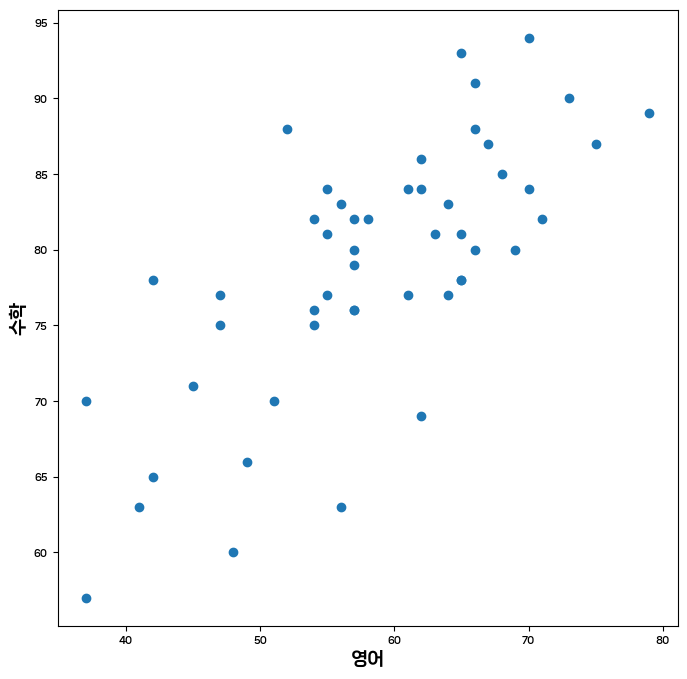

In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df['english'],df['mathematics'])
ax.set_xlabel('영어',size=13)
ax.set_ylabel('수학',size=13)
plt.show()

In [43]:
# 회귀직선: ★y = β0 + β1x★, 두 데이터 사이의 관계를 보는 선, 입력값들이 독립적이어야 함(관계 없어야 함)

In [44]:
poly_fit = np.polyfit(en_scores,ma_scores,1) #1차 방정식
poly_fit

array([ 0.73023256, 31.2372093 ])

In [45]:
poly_1d = np.poly1d(poly_fit)

In [46]:
poly_1d

poly1d([ 0.73023256, 31.2372093 ])

In [61]:
xs = np.linspace(en_scores.min(),ma_scores.max())

In [62]:
xs

array([41.        , 41.83673469, 42.67346939, 43.51020408, 44.34693878,
       45.18367347, 46.02040816, 46.85714286, 47.69387755, 48.53061224,
       49.36734694, 50.20408163, 51.04081633, 51.87755102, 52.71428571,
       53.55102041, 54.3877551 , 55.2244898 , 56.06122449, 56.89795918,
       57.73469388, 58.57142857, 59.40816327, 60.24489796, 61.08163265,
       61.91836735, 62.75510204, 63.59183673, 64.42857143, 65.26530612,
       66.10204082, 66.93877551, 67.7755102 , 68.6122449 , 69.44897959,
       70.28571429, 71.12244898, 71.95918367, 72.79591837, 73.63265306,
       74.46938776, 75.30612245, 76.14285714, 76.97959184, 77.81632653,
       78.65306122, 79.48979592, 80.32653061, 81.16326531, 82.        ])

In [63]:
ys = poly_1d(xs)

In [64]:
ys

array([61.17674419, 61.7877551 , 62.39876602, 63.00977693, 63.62078785,
       64.23179877, 64.84280968, 65.4538206 , 66.06483151, 66.67584243,
       67.28685335, 67.89786426, 68.50887518, 69.11988609, 69.73089701,
       70.34190793, 70.95291884, 71.56392976, 72.17494067, 72.78595159,
       73.39696251, 74.00797342, 74.61898434, 75.22999525, 75.84100617,
       76.45201709, 77.063028  , 77.67403892, 78.28504983, 78.89606075,
       79.50707167, 80.11808258, 80.7290935 , 81.34010441, 81.95111533,
       82.56212625, 83.17313716, 83.78414808, 84.39515899, 85.00616991,
       85.61718083, 86.22819174, 86.83920266, 87.45021357, 88.06122449,
       88.67223541, 89.28324632, 89.89425724, 90.50526815, 91.11627907])

In [65]:
41 * 0.73023256 + 31.2372093 # = 61.17674419 /  β1x + β0 = y

61.17674426

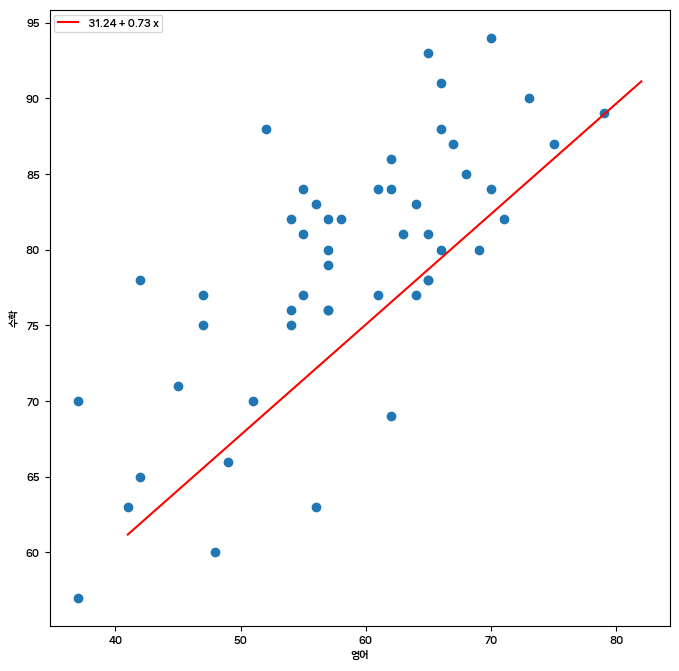

In [66]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df['english'],df['mathematics'])
ax.plot(xs,ys,color='red', 
        label=f' {poly_fit[1]:.2f} + {poly_fit[0]:.2f} x')
ax.set_xlabel('영어')
ax.set_ylabel('수학')
ax.legend(loc = 'upper left')
plt.show()

In [67]:
# 히트맵: 히스토그램의 2차원 버전

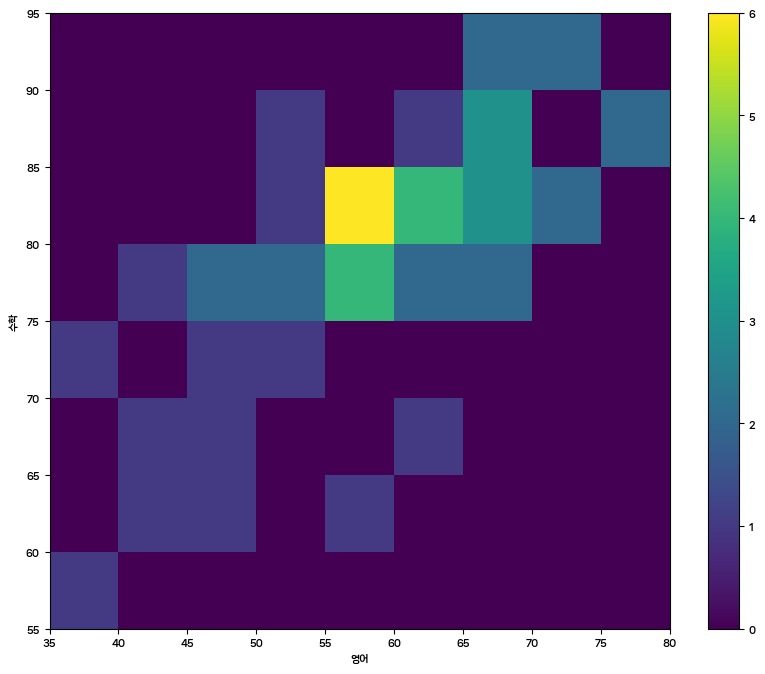

In [68]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(df['english'],df['mathematics'],
              bins=[9,8],
              range=[(35,80),(55,95)])
ax.set_xlabel('영어')
ax.set_ylabel('수학')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax = ax)
plt.show()